In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
grocery_df= pd.read_csv("/content/drive/MyDrive/Datasets/Groceries_dataset.csv")
grocery_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
grocery_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## EDA

In [ ]:
len(grocery_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


38765

In [ ]:
grocery_df.isna().sum()
grocery_df.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(grocery_df[grocery_df.duplicated(keep='first')==True])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
grocery_df.drop_duplicates(inplace=True)# Dropping the duplicates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
grocery_df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Member_number,int64
Date,object
itemDescription,object


#### Checking the number of Items

In [ ]:
grocery_df['itemDescription'].value_counts(ascending=False).reset_index()
## Total number of 167 unique items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemDescription,count
0,whole milk,2363
1,other vegetables,1827
2,rolls/buns,1646
3,soda,1453
4,yogurt,1285
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


In [ ]:
#### Number of Items bought wrt Year

date_df= grocery_df.groupby('Date')['itemDescription'].count().reset_index()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of Items Sold')

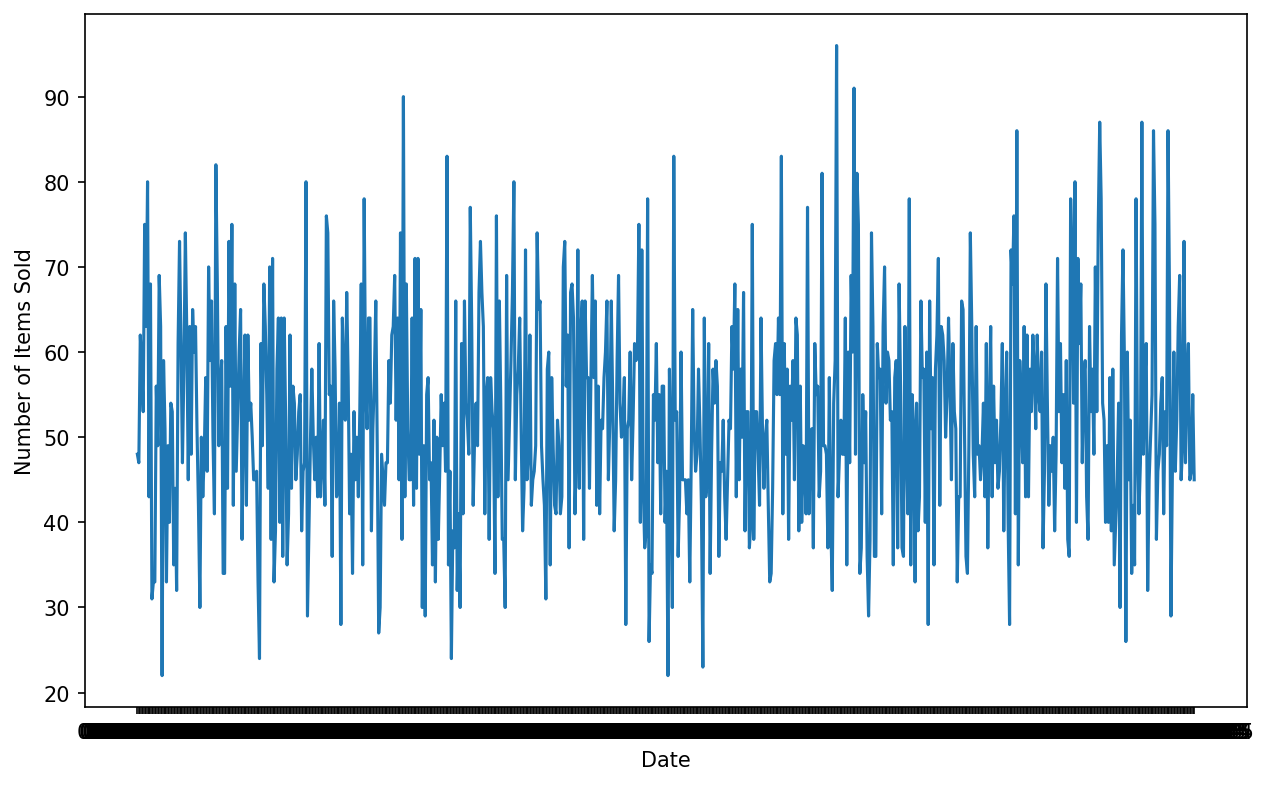

In [ ]:
plt.figure(figsize=(10,6), dpi=150)
sns.lineplot(data= date_df, x='Date', y='itemDescription')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')

#### Day on which Max Number of Items were sold

In [ ]:
grocery_df.groupby('Date')['itemDescription'].count().idxmax()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'21-01-2015'

#### Day on which least number of items were sold

In [ ]:
grocery_df.groupby('Date')['itemDescription'].count().idxmin()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'01-09-2015'

#### Top five most sold items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 750x450 with 0 Axes>

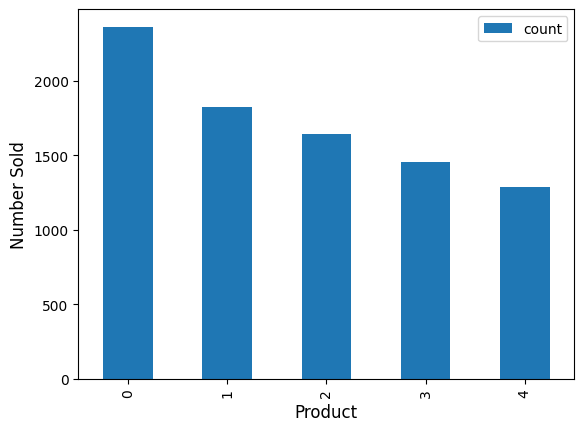

In [ ]:
plt.figure(figsize=(5,3), dpi=150)
data=grocery_df.itemDescription.value_counts(ascending=False).reset_index().head(5)
data.plot(kind='bar')
plt.xlabel('Product', size= 12)
plt.ylabel('Number Sold', size= 12)
plt.show()

## Data Transformation to implement Apriori and Association Algorithm

#### Number of Items bought by user in one transaction

In [ ]:
grocery_df[(grocery_df.Member_number==1808) & (grocery_df.Date== '2015-07-21')]
member = grocery_df.Member_number.values # extracting unique members
dates = grocery_df.Date.values # extracting Dates
transactions = [list(grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])].itemDescription) for i in zip(member,dates)]
print(len(transactions))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


38006


### Creating an empty list transactions

In [ ]:
member = grocery_df.Member_number.values # extracting unique members

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates = grocery_df.Date.values # extracting Dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = [list(grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])].itemDescription) for i in zip(member,dates)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['tropical fruit', 'rolls/buns', 'candy']

In [ ]:
print(len(transactions))

38006


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Creating Rules for Single Antecendent and Consequent

In [ ]:
from itertools import permutations
flattenlist= [i for row in transactions for  i in row  ]
flattenlist= list(set(flattenlist))
rules = list(permutations(flattenlist,2))
rules[0], len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(('dishes', 'hard cheese'), 27722)

In [ ]:
flattenlist= [i for row in transactions for  i in row  ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
flattenlist= list(set(flattenlist))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = list(permutations(flattenlist,2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules[0], len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(('dishes', 'hard cheese'), 27722)

### Finding the Most Common Combination

In [ ]:
from collections import Counter
newlist= []
for i in transactions:
    newlist.append(tuple(i))
    c= Counter(newlist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
newlist= []
for i in transactions:
    newlist.append(tuple(i))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
c= Counter(newlist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
c.most_common(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(('other vegetables', 'whole milk'), 98)]

### Encoding the data using TransactionEncoder

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()
print(onehot.mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Instant food products    0.004499
UHT-milk                 0.024575
abrasive cleaner         0.001921
artif. sweetener         0.002947
baby cosmetics           0.000316
                           ...   
white bread              0.029022
white wine               0.013840
whole milk               0.181445
yogurt                   0.100931
zwieback                 0.004868
Length: 167, dtype: float64


In [ ]:
encoder = TransactionEncoder().fit(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
onehot = encoder.transform(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
len(onehot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


38006

### Computing Support for Single Items

In [ ]:
print(onehot.mean())

Instant food products    0.004499
UHT-milk                 0.024575
abrasive cleaner         0.001921
artif. sweetener         0.002947
baby cosmetics           0.000316
                           ...   
white bread              0.029022
white wine               0.013840
whole milk               0.181445
yogurt                   0.100931
zwieback                 0.004868
Length: 167, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Computing Support, Confidence, Zhang Metric and Lift for other vegetables <- Whole Milk

#### Support: Support is an indication of how frequently the item set appears in the data set.

supp(X⇒Y)=|X∪Y|n where n is number of transactions

In [ ]:
onehot['other vegetables & whole milk'] = np.logical_and(onehot['other vegetables'],onehot['whole milk'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(onehot.mean())

Instant food products            0.004499
UHT-milk                         0.024575
abrasive cleaner                 0.001921
artif. sweetener                 0.002947
baby cosmetics                   0.000316
                                   ...   
white wine                       0.013840
whole milk                       0.181445
yogurt                           0.100931
zwieback                         0.004868
other vegetables & whole milk    0.021944
Length: 168, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Confidence: For a rule X⇒Y, confidence shows the percentage in which Y is bought with X. It’s an indication of how often the rule has been found to be true.

conf(X⇒Y)=supp(X∪Y)supp(X)

In [ ]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()
confidence= support_vegandmilk/support_vegetable
print("Confidence: ", confidence)
lift = support_vegandmilk/(support_vegetable* support_milk)
print("Lift: ", lift)
Leverage= support_vegandmilk - (support_vegetable* support_milk)
print("Leverage: ", Leverage)
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()
num = support_vegandmilk - support_milk*support_vegetable
denom = max(support_vegandmilk*(1-support_vegetable), support_vegetable*(support_milk-support_vegandmilk))
zhang = num / denom
print("Zhang Metric" ,zhang) # Value is positive, so positive association

Confidence:  1.0
Lift:  5.511310904872389
Leverage:  0.01796229123860991
Zhang Metric 0.8369202625632196


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
confidence= support_vegandmilk/support_vegetable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Confidence: ", confidence)

Confidence:  1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Lift: It is metric for evaluating the relationship between items.
Numerator: Proportion of transactions that contain X and Y.
Denominator: Proportion if X and Y assigned randomly and independently.
![Screenshot%202023-01-07%20at%202.41.04%20AM.png](attachment:Screenshot%202023-01-07%20at%202.41.04%20AM.png)

In [ ]:
lift = support_vegandmilk/(support_vegetable* support_milk)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Lift: ", lift)

Lift:  5.511310904872389


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Leverage: It lies in the range -1 to +1 and is easy to interpret
![Screenshot%202023-01-07%20at%202.43.55%20AM.png](attachment:Screenshot%202023-01-07%20at%202.43.55%20AM.png)

In [ ]:
Leverage= support_vegandmilk - (support_vegetable* support_milk)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Leverage: ", Leverage)

Leverage:  0.01796229123860991


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Zhang Metric: It measures association as well as dissociation. Value of +1 indicates perfect association. Value of -1 indicates perfect dissociation.
![Screenshot%202023-01-07%20at%202.50.57%20AM.png](attachment:Screenshot%202023-01-07%20at%202.50.57%20AM.png)

In [ ]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num = support_vegandmilk - support_milk*support_vegetable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
denom = max(support_vegandmilk*(1-support_vegetable), support_vegetable*(support_milk-support_vegandmilk))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
zhang = num / denom
print("Zhang Metric" ,zhang) # Value is positive, so positive association

Zhang Metric 0.8369202625632196


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Implementing the Apriori Algorithm: Apriori algorithm prunes itemsets on basis of min support, rather than association rules.

1. Apriori prunes itemsets.
2. Applies minimum support threshold.
3. Modiified version can prune by number of items.
4. Doesn't tell us about association rules.
5. Difficult to compute for higher number of items

In [ ]:
frequent_itemsets = apriori(onehot, min_support = 0.01, max_len = 3, use_colnames = True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.024575,(UHT-milk)
1,0.039599,(beef)
2,0.024917,(berries)
3,0.019365,(beverages)
4,0.054860,(bottled beer)


In [ ]:
print(len(frequent_itemsets))

92


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.024575,(UHT-milk)
1,0.039599,(beef)
2,0.024917,(berries)
3,0.019365,(beverages)
4,0.054860,(bottled beer)


### Implementing Association Rules: association_rules() takes frequent items, metric, and threshold.

In [ ]:
frequent_itemsets = apriori(onehot, min_support = 0.01, max_len = 3, use_colnames = True)
frequent_itemsets.head()
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01, max_len = 2)
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
4,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706


In [ ]:
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01, max_len = 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Pruning using support

In [ ]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
4,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706


In [ ]:
len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42

In [ ]:
rules.consequents.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'citrus fruit'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'}),
       frozenset({'sausage'}), frozenset({'soda'}), frozenset({'yogurt'}),
       frozenset({'other vegetables & whole milk'}),
       frozenset({'pastry'}), frozenset({'root vegetables'}),
       frozenset({'tropical fruit'})], dtype=object)

#### Computing Zhang's Rule to see disassociation

In [ ]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values,
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336,0.052336
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396,-0.198396
4,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706,0.022706


#### filtering the value with zhang rules <0 to see disassociation

In [ ]:
rules[rules.zhang<=0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396,-0.198396
6,(rolls/buns),(other vegetables),0.126822,0.136531,0.015576,0.122822,0.899587,-0.001739,0.984371,-0.113344,-0.113344
7,(other vegetables),(rolls/buns),0.136531,0.126822,0.015576,0.114087,0.899587,-0.001739,0.985625,-0.114473,-0.114473
10,(other vegetables),(soda),0.136531,0.111482,0.013945,0.102139,0.916191,-0.001276,0.989594,-0.095792,-0.095792
11,(soda),(other vegetables),0.111482,0.136531,0.013945,0.125089,0.916191,-0.001276,0.986921,-0.093343,-0.093343
12,(other vegetables),(whole milk),0.136531,0.181445,0.021944,0.160725,0.885803,-0.002829,0.975312,-0.129908,-0.129908
13,(whole milk),(other vegetables),0.181445,0.136531,0.021944,0.120940,0.885803,-0.002829,0.982264,-0.136066,-0.136066
14,(other vegetables),(yogurt),0.136531,0.100931,0.012288,0.089998,0.891675,-0.001493,0.987985,-0.123340,-0.123340
15,(yogurt),(other vegetables),0.100931,0.136531,0.012288,0.121741,0.891675,-0.001493,0.983160,-0.119038,-0.119038


#### filtering the value with zhang rules >0  to see positive association

In [ ]:
rules[rules.zhang>0].sort_values('zhang', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
40,(whole milk),(other vegetables & whole milk),0.181445,0.021944,0.021944,0.120940,5.511311,0.017962,1.112615,1.000000,1.000000
16,(other vegetables),(other vegetables & whole milk),0.136531,0.021944,0.021944,0.160725,7.324340,0.018948,1.165358,1.000000,1.000000
17,(other vegetables & whole milk),(other vegetables),0.021944,0.136531,0.021944,1.000000,7.324340,0.018948,inf,0.882842,0.882842
41,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf,0.836920,0.836920
32,(yogurt),(sausage),0.100931,0.074225,0.010051,0.099583,1.341633,0.002559,1.028162,0.283226,0.283226
33,(sausage),(yogurt),0.074225,0.100931,0.010051,0.135413,1.341633,0.002559,1.039882,0.275056,0.275056
28,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512,0.198896,0.198896
29,(sausage),(soda),0.074225,0.111482,0.010051,0.135413,1.214658,0.001776,1.027679,0.190892,0.190892
30,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191,0.124617,0.124617
31,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830,0.110185,0.110185


#### Pruning using Leverage metric

In [ ]:
rules = association_rules(frequent_itemsets,metric = "leverage", min_threshold = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
2,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706
3,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791
4,(other vegetables),(sausage),0.136531,0.074225,0.010840,0.079399,1.069702,0.000706,1.005620,0.075463


In [ ]:
len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18

In [ ]:
rules.consequents.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'citrus fruit'}), frozenset({'sausage'}),
       frozenset({'other vegetables'}),
       frozenset({'other vegetables & whole milk'}), frozenset({'soda'}),
       frozenset({'yogurt'})], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


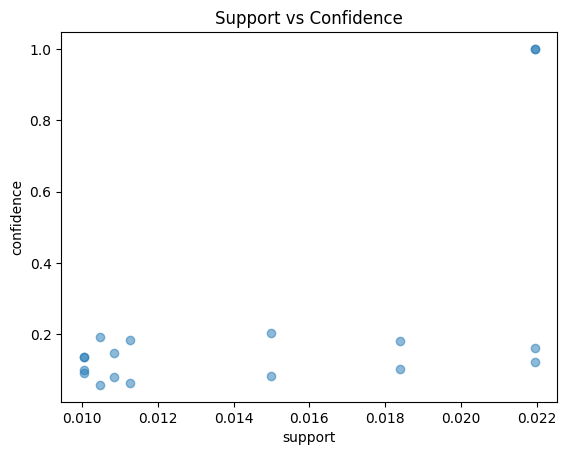

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


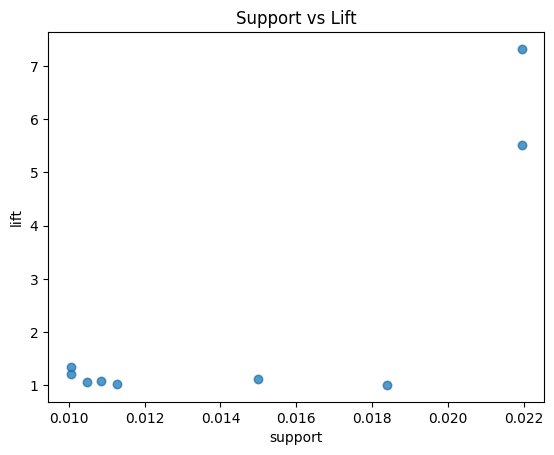

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


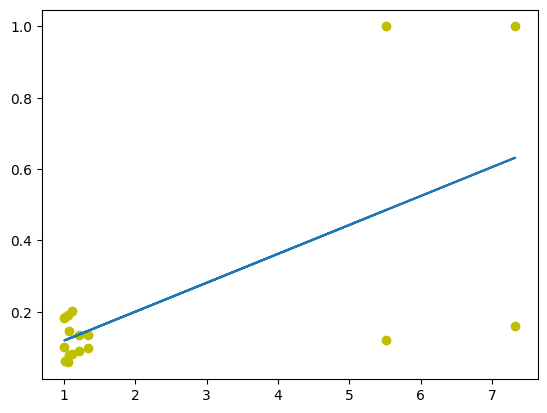

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))

### Multi Metric Filtering

#### Targeting consequent == whole milk

In [ ]:
targeted_rules = rules[rules['consequents'] == {'whole milk'}].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
targeted_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
3,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791
11,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830,0.110185
15,(yogurt),(whole milk),0.100931,0.181445,0.018392,0.182221,1.004277,0.000078,1.000949,0.004737
17,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf,0.836920


In [ ]:
filtered_rules = targeted_rules[(targeted_rules['antecedent support'] > 0.01) &
(targeted_rules['support'] > 0.009) &
(targeted_rules['confidence'] > 0.85) &
(targeted_rules['lift'] > 1.00)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(filtered_rules['antecedents'])

17    (other vegetables & whole milk)
Name: antecedents, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualising the rules

In [ ]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
print(rules[['antecedents','consequents']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     antecedents    consequents
0     whole milk   bottled beer
1   bottled beer     whole milk
2     whole milk  bottled water
3  bottled water     whole milk
4     whole milk   citrus fruit


In [ ]:
len(frequent_itemsets )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


91

In [ ]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42

In [ ]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(rules[['antecedents','consequents']].head())

     antecedents    consequents
0     whole milk   bottled beer
1   bottled beer     whole milk
2     whole milk  bottled water
3  bottled water     whole milk
4     whole milk   citrus fruit


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
support_table = rules.pivot(index='consequents', columns='antecedents',values='support')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
support_table.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents,bottled beer,bottled water,citrus fruit,other vegetables,other vegetables & whole milk,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt
consequents,,,,,,,,,,,,,
bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010472,NaN
bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010209,NaN
citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011261,NaN
other vegetables,NaN,NaN,NaN,NaN,0.021944,NaN,0.015576,NaN,0.01084,0.013945,NaN,0.021944,0.012288
other vegetables & whole milk,NaN,NaN,NaN,0.021944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021944,NaN


In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


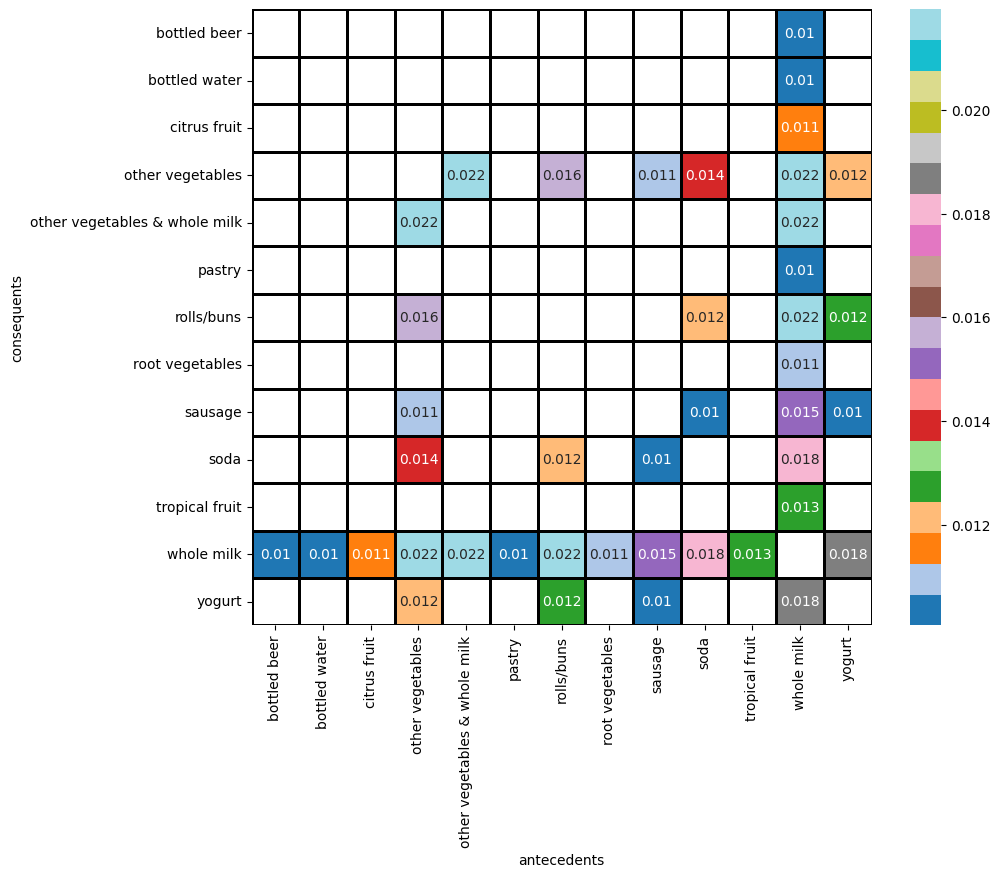

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(support_table, cmap= "tab20", annot=True, linewidths= 2, linecolor= 'black')
plt.show()

#### From heat map above, we can see following association:
1. other vegetable <-- whole milk
2. rolls/buns <-- whole milk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

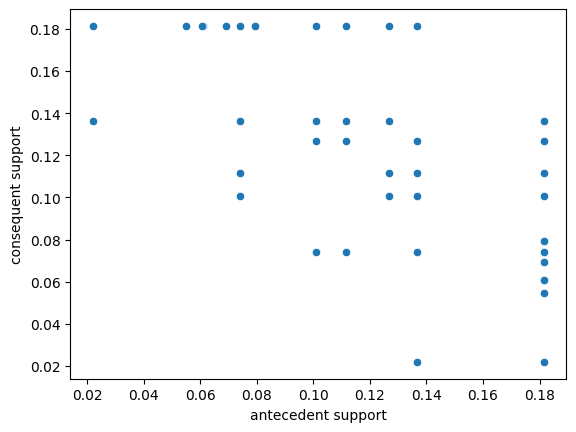

In [ ]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

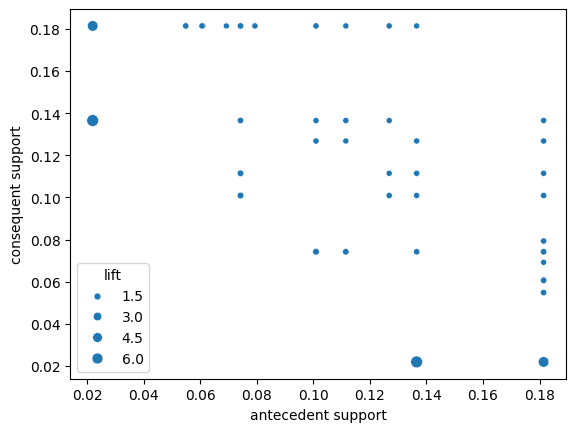

In [ ]:
sns.scatterplot(x="antecedent support",y="consequent support",size="lift",data=rules)

#### scatter plot above, we can observe that no support exceeds value 0.18.

### Parallel coordinate plots to observe Rules

In [ ]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets,metric = 'lift', min_threshold = 1.00)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets,metric = 'lift', min_threshold = 1.00)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))

     antecedent  consequent  rule
0  bottled beer  whole milk     0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pandas.plotting import parallel_coordinates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


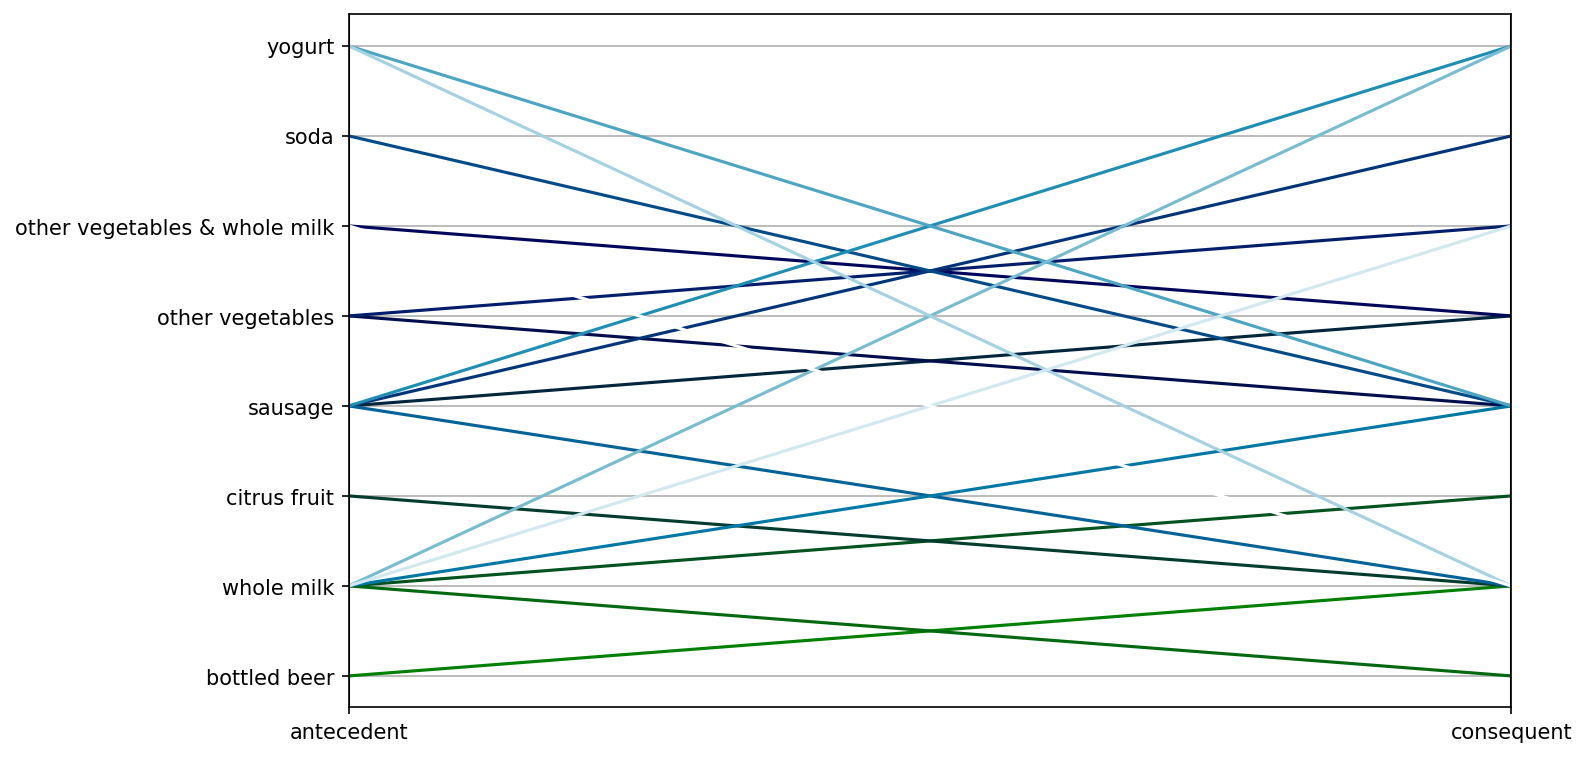

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize= (10,6), dpi= 150)
ax= parallel_coordinates(coords, 'rule', colormap = 'ocean')
leg = plt.legend()

ax.get_legend().remove()
plt.show()

#### From the plot above, we can different associations of antencendent and consequent in which ligher shaded lines shows stronger association such as yogurt <- whole milk

In [ ]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values,
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule,zhang
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336,bottled beer,whole milk,0,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430,whole milk,bottled beer,1,0.060430
2,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706,whole milk,citrus fruit,2,0.022706
3,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791,citrus fruit,whole milk,3,0.019791
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144,0.070384,sausage,other vegetables,4,0.070384


#### From this we can see whole milk is bought with beer and citrus fruits and sausages are bought with other vegetables